In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv("data_train.csv")
df_test = pd.read_csv("data_test.csv")

In [3]:
x_train = df_train.values[:,:-2]
y_train = df_train.values[:,-2]

In [4]:
x_test = df_test.values[:,:-2]
y_test = df_test.values[:,-2]

In [5]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(units=1))
model.compile(loss='mse',
              optimizer='RMSprop',
              metrics=['mse'])

In [6]:
%%time
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    verbose=1,
                    batch_size=10,
                    validation_split=0.1)

Train on 3600 samples, validate on 400 samples
Epoch 1/40
3600/3600 [==============================] - 0s 103us/step - loss: 1587.8417 - mean_squared_error: 1587.8417 - val_loss: 1498.2242 - val_mean_squared_error: 1498.2242
Epoch 2/40
3600/3600 [==============================] - 0s 72us/step - loss: 1347.4656 - mean_squared_error: 1347.4656 - val_loss: 1195.3693 - val_mean_squared_error: 1195.3693
Epoch 3/40
3600/3600 [==============================] - 0s 71us/step - loss: 1003.3176 - mean_squared_error: 1003.3176 - val_loss: 809.4159 - val_mean_squared_error: 809.4159
Epoch 4/40
3600/3600 [==============================] - 0s 71us/step - loss: 611.1053 - mean_squared_error: 611.1053 - val_loss: 423.9088 - val_mean_squared_error: 423.9088
Epoch 5/40
3600/3600 [==============================] - 0s 70us/step - loss: 273.8991 - mean_squared_error: 273.8991 - val_loss: 155.5467 - val_mean_squared_error: 155.5467
Epoch 6/40
3600/3600 [==============================] - 0s 84us/step - loss: 

In [7]:
model.evaluate(x_test, y_test)


1000/1000 [==============================] - 0s 16us/step


[0.0021184853008016946, 0.0021184853008016946]

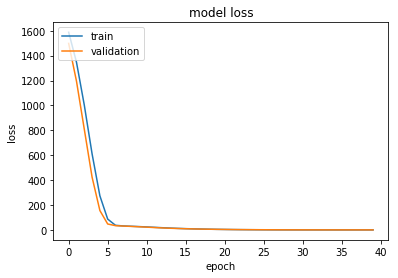

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()